# <a href="https://mipt-stats.gitlab.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Задание 6

**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`.
* Дедлайн **17 апреля в 22:00**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb` и все фотографии, если пишете теоретическую часть от руки.
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него.

-----

*Замечания.* Теоретические решения можно оформить
* в $\LaTeX$-формате в ноутбуке;
* написать от руки и прикрепить к ноутбуку;
* написать от руки и выслать боту.  

Во втором случае также **важно** "вшить" фото в ноутбук. Сделать это можно с помощью Edit -> Insert Image в Jupyter или с помощью кнопки "Вставить изображение" в Colab. Следите за размером итогового файла.

Фотографии принимаются только в хорошем качестве, **следите за освещением и почерком**. На фотографиях также указывайте номера задач.

-----

In [15]:
import numpy as np
import pandas as pd
import scipy.stats as sps
from statsmodels.graphics import gofplots as gf
from matplotlib import pyplot as plt
import seaborn as sns

red = '#FF3300'
blue = '#0099CC'
green = '#00CC66'

from statsmodels.stats import diagnostic 
from statsmodels.sandbox.stats.multicomp import multipletests
from tqdm import tqdm

%matplotlib inline


#Критерии согласия

##Теоретическая часть



###Задача 1. (основной поток, 5 баллов)
 Компания по производству кормов для собак провела опрос $5000$ владельцев собак о том, какой корм предпочитают их питомцы. По результатам опроса оказалось, что $1010$ собак предпочитают корм со вкусом лосося, $2200$ &mdash; со вкусом курицы, $950$ &mdash; со вкусом говядины, а все остальные собаки предпочитают корм с овощами. Компания сделала предположение, что вероятности предпочтения кормов равны соответственно $\theta, 2\theta, \theta, 1-4\theta$,
	где $\theta\in(0,1/4)$. Верно ли данное предположение? Выпишите теоретические формулы и код для подсчета значения статистики и p-value  в `scipy`. Вычисление статистики и p-value можно выполнить в Питоне.


Применим критерий хи - квадрат 

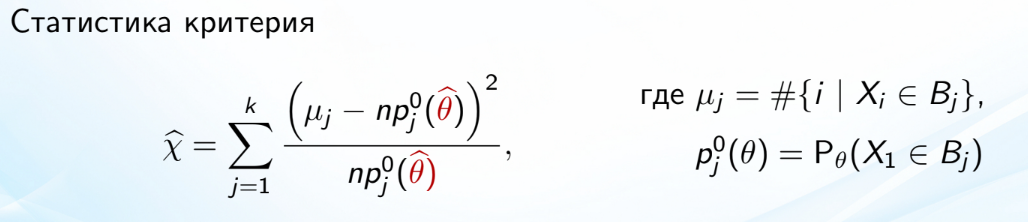

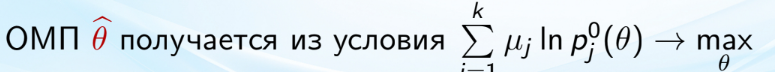

В данном случае ОМП это $\Theta_0 = 0.2$

Посчитаем значение статистики

In [11]:
N =  np.array([1010,2200,950,840])
P =  np.array([0.2,0.4,0.2,0.2])*5000

S = np.sum((N-P)**2/P)

S,sps.chisquare(N,P,ddof = 1)

(48.2, Power_divergenceResult(statistic=48.2, pvalue=3.4158829937838545e-11))

P-v получилось очень малым -> гипотеза отвергается с большой увереностью

## Практическая часть

При решении стоит использовать **готовые реализации критериев из** `scipy.stats`. При возникновении затруднений посмотрите в ноутбук с лекции 9.
________________
### Задача 2. (все потоки, 8 баллов)

С помощью критерия хи-квадрат вам нужно проверить, правильно ли `scipy.stats` генерирует случайные величины. 

**1.** Реализуйте критерий хи-квадрат для проверки корректности генерации выборки $U\{1, ..., 10\}$ (дискретное равномерное распределение). Тем самым проверьте, что `sps.randint` действительно генерирует выборку из равномерного распределения. Подберите размер выборки такой, чтобы выполнялись условия применимости критерия хи-квадрат. Поясните свой выбор.





In [40]:
Samples = sps.randint.rvs(1,11, size = 200)

Real = np.zeros(10)
for i in range(1,11):
    Real[i-1] = len(Samples[Samples == i])
    
Real

array([26., 26., 21., 19., 14., 16., 18., 21., 17., 22.])

In [42]:
sps.chisquare(Real)

Power_divergenceResult(statistic=7.200000000000001, pvalue=0.6163052249833652)

Гипотеза о равномерности не отвергается, и pvalue получается не слишком большим, потому что генератор слуайных чисел не должен в точности повторять ожидаемое распределение по кучкам

**2.** Проверьте, действительно ли код `sps.poisson(mu=5).rvs(size=1000)` генерирует выборку размера 1000 из пуассоновского распределения с параметром 5. 

**Указания**
1. Не забудьте учесть условия применимости критерия хи-квадрат;
2. Для вычисления дискретной плотности (вероятности) воспользуйтесь `sps.poisson(mu=5).pmf`;
3. Для подсчета количества элементов в разбиении на множества воспользуйтесь `np.unique(sample, return_counts=True)`;
4. Не нужно писать сколь-либо универсальный код, который одним нажатием кнопки проверяет гипотезу с учетом всех условий применимости критерия. Расписывайте код поэтапно, на каждый логический этап свой код в отдельной ячейке для *конкретной* реализации выборки. Так вам проще реализовать, а нам проще проверять.




In [60]:
Sample = sps.poisson(mu=5).rvs(size=1000)

Counts = np.unique(Sample, return_counts=True)
Counts[1]

array([  9,  41,  82, 143, 192, 155, 147, 102,  67,  34,  16,   8,   3,
         1], dtype=int64)

Видно, что в хвосте слишком малая плотность вероятности, так что нужно обьеденить две последние точки

In [99]:
Counts[0],sps.poisson(mu=5).pmf(11)*1000,sps.poisson(mu=5).pmf(12)*1000

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 8.242176685373563,
 3.4342402855723226)

Обьеденим 12 и 13

In [102]:
Real = Counts[1][:-1]
Real[-1] += Counts[1][-1] 

In [103]:
Expected = sps.poisson(mu=5).pmf(Counts[0][:-1])
Expected[-1] += sps.poisson(mu=5).pmf(Counts[0][-1])
Expected*=1000

sps.poisson(mu=5).pmf(11)*1000

8.242176685373563

In [104]:
sps.chisquare(Real,Expected)

Power_divergenceResult(statistic=11.246050951678983, pvalue=0.5079581346871196)

**Вывод:**

Так как наше удовлетвоярет условиям n>= 50, np_0 > 5, то распределение статистики довльно похоже на хи квадрат. Мы получили p-v 0.5, что говорит о том что гипотезу отврегать нельзя

__________________
### Задача 3. (основной поток, 8 баллов)

На лекциях и семинарах были разобраны следующие критерии проверки нормальности:
* Колмогорова;
* Жарка-Бера;
* Шапиро-Уилка;
* Лиллиефорса.

При этом критерий Колмогорова универсален, но существует его модификация для проверки нормальности — <a href="https://ru.wikipedia.org/wiki/Критерий_Лиллиефорса"> Критерий Лиллиефорса.</a> При решении задачи можно взять реализацию из библиотеки `statsmodels`: <a href="https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.lilliefors.html">`statsmodels.stats.diagnostic.lilliefors`</a>. Критерий Колмогорова можно попробовать применить для конкретной $F_0$ (оценив ее), пример использования можно найти в ноутбуке с лекции.

**1.** Данные критерии являются асимптотическими, и их реальное значение уровня значимости может отличаться от желаемого числа $\alpha=0.05$. На семинаре разобран метод оценки реального уровня значимости критерия. Посчитайте реальный уровень значимости этих критериев для размеров выборки от 5 до 100. В данном случае можно привести теоретические соображения, согласно которым стоит использовать количество генерируемых выборок `sample_count `$\ge 10^6$, но для ускорения работы при выполнении задания можете использовать `sample_count = 10**4`.



*Подсказка:*

Не очень понял, зачем использовать критерий колмогорова с оцененой F_0, если это и есть критерий Лиллифероса. В нем мы оцениваем параметры размера и сдвига

In [63]:
max_sample_size = 95
sample_count = 10**(4)


is_reject_Liliferos   = np.zeros((max_sample_size, sample_count))
is_reject_ShapiroWilk = np.zeros((max_sample_size, sample_count))
is_reject_JarqueBera  = np.zeros((max_sample_size, sample_count))

for i in tqdm(range(max_sample_size)):
    for j in range(sample_count):
        sample = sps.norm.rvs(size = i + 5)
        is_reject_Liliferos[i,j]  = diagnostic.lilliefors(sample, dist ='norm')[1] <= 0.05
        is_reject_ShapiroWilk[i,j] = sps.shapiro(sample)[1] <= 0.05
        is_reject_JarqueBera[i,j] = sps.jarque_bera(sample)[1] <= 0.05

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [12:08<00:00,  7.66s/it]


In [68]:
Aplha_Liliferos = np.sum(is_reject_Liliferos, axis = 1)/10**(4)
Aplha_ShapiroWilk = np.sum(is_reject_ShapiroWilk, axis = 1)/10**(4)
Aplha_JarqueBera = np.sum(is_reject_JarqueBera, axis = 1)/10**(4)

Нарисуйте на одном графике зависимость реального уровня значимости от размера выборки для каждого критерия. Пунктиром отметьте уровень 0.05. Не забудьте добавить легенду и подписать оси.

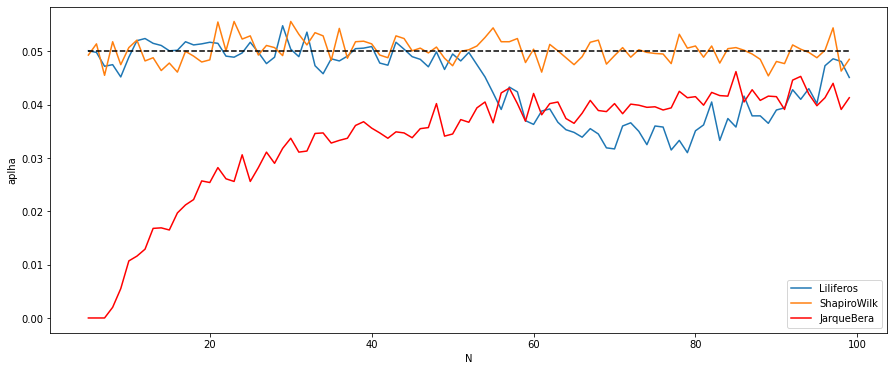

In [65]:
plt.figure(figsize = (15,6))
plt.plot(np.arange(5,100),Aplha_Liliferos,label = 'Liliferos')
plt.plot(np.arange(5,100),Aplha_ShapiroWilk,label = 'ShapiroWilk')
plt.plot(np.arange(5,100),Aplha_JarqueBera,label = 'JarqueBera',color = 'red')
plt.plot(np.arange(5,100),[0.05]*95,'--',color = 'black')
plt.xlabel('N')
plt.ylabel('aplha')
plt.legend()

Какой можно сделать вывод?

Возникает интересный минимум в критерии Лиллифороса, он связан с поведением соответ. функции распределения. Метод Харка Бера показывает возрастание alpha с ростом n до 0.05, на глаз кажется, что по логарифму при маленьких n, происходит это по всей видимости из-за маленькой мощности: почти любое распределение похожее по форме на нормальное проходит тест. Критерий Шапиро всегда прыгает около 0.05. В целом при размере выборки 100 уже можно пользоваться всеми этими критертями

**2.** Аналогичным образом можно вычислять мощность критерия. Вычислите мощности критериев для размеров выборки от 5 до 100, если альтернативная гипотеза заключается в том, что выборка имеет стандартное распределение Коши. Иначе говоря, для критерия $S$ надо приближенно посчитать $\beta_S(\mathsf{P})$, где $\mathsf{P}$ — стандартное распределение Коши.

Нарисуйте на одном графике зависимость мощности критерия от размера выборки для каждого критерия. Не забудьте добавить легенду и подписать оси.


In [101]:
max_sample_size = 95
sample_count = 10**(4)


is_reject_Liliferos   = np.zeros((max_sample_size, sample_count))
is_reject_ShapiroWilk = np.zeros((max_sample_size, sample_count))
is_reject_JarqueBera  = np.zeros((max_sample_size, sample_count))

for i in tqdm(range(max_sample_size)):
    for j in range(sample_count):
        sample = sps.cauchy.rvs(size = i + 5)
        is_reject_Liliferos[i,j]  = diagnostic.lilliefors(sample, dist ='norm')[1] >= 0.05
        is_reject_ShapiroWilk[i,j] = sps.shapiro(sample)[1] >= 0.05
        is_reject_JarqueBera[i,j] = sps.jarque_bera(sample)[1] >= 0.05

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [10:51<00:00,  6.86s/it]


In [102]:
Power_Liliferos = np.sum(is_reject_Liliferos, axis = 1)/10**(4)
Power_ShapiroWilk = np.sum(is_reject_ShapiroWilk, axis = 1)/10**(4)
Power_JarqueBera = np.sum(is_reject_JarqueBera, axis = 1)/10**(4)

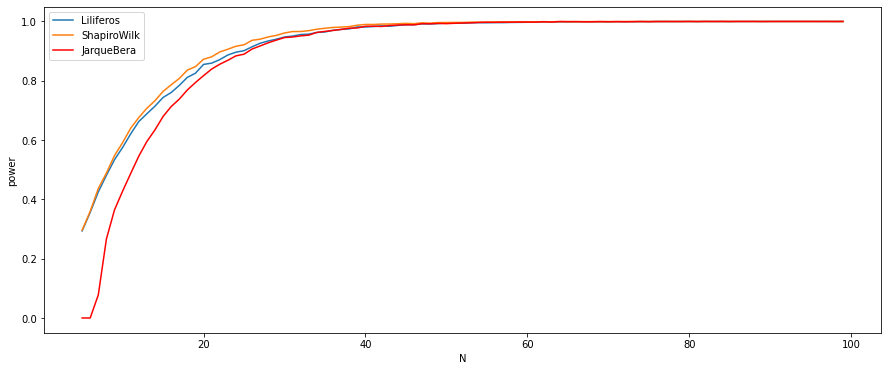

In [103]:
plt.figure(figsize = (15,6))
plt.plot(np.arange(5,100),1-Power_Liliferos,label = 'Liliferos')
plt.plot(np.arange(5,100),1-Power_ShapiroWilk,label = 'ShapiroWilk')
plt.plot(np.arange(5,100),1-Power_JarqueBera,label = 'JarqueBera',color = 'red')
plt.xlabel('N')
plt.ylabel('power')
plt.legend()

Сделайте вывод. Какой критерий является наиболее мощным при данной альтернативе?

Наиболее мощный критерий у теста Шапиро Уилка, а самый слабый как и ожадалось - у Харка Бера

**3*.** (4 балла) Распределение [Стьюдента](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%A1%D1%82%D1%8C%D1%8E%D0%B4%D0%B5%D0%BD%D1%82%D0%B0) является в некотором смысле обобщением нормального распределения (при бесконечном количестве степеней свободы) и распределения Коши (при одной степени свободы). 

Постройте на одном графике графики плотности распределения Коши, распределения Стьюдента с 1, 5, 10 степенями свободы и стандартного нормального распределения. Как меняется форма графика распределения Стьюдента с изменением количества степеней свободы? 

In [ ]:
<...>

Посчитайте приближенно мощности критериев для выборки размера 50 если альтернатива заключается в том, что выборка имеет распределение Стьюдента. Поскольку мощность критерия является функцией от распределения из альтернативной гипотезы, вам нужно реализовать функцию (например, принимающую количество степенй свободы). Посчитайте её значения для целых значений степени свободы от 1 до 10.

Нарисуйте на одном графике зависимость мощности критерия от **количества степеней свободы** для каждого из трех критериев. Не забудьте добавить легенду и подписать оси.

In [ ]:
<...>

Сделайте вывод относительно мощности критерия при разных распределениях из альтернативы. Объясните наблюдаемую зависимость мощности от степени свободы.

<...>

__________________
### Задача 4. (основной поток, 12 баллов)


Cкачайте данные <a href="http://archive.ics.uci.edu/ml/datasets/wine">`wine dataset`</a>. Для этого зайдите в папку "DataFolder" и скачайте файл `wine.data`. Читать файл можно с помощью функции `read_csv`.  В этом датасете представлены различные характеристики вин. Возьмите все колонки, кроме `Class` (класс вина). В дальнейшем, как и раньше, будем называть колонки признаками.

In [16]:
Wine = pd.read_csv('wine.data', header = None)

Wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


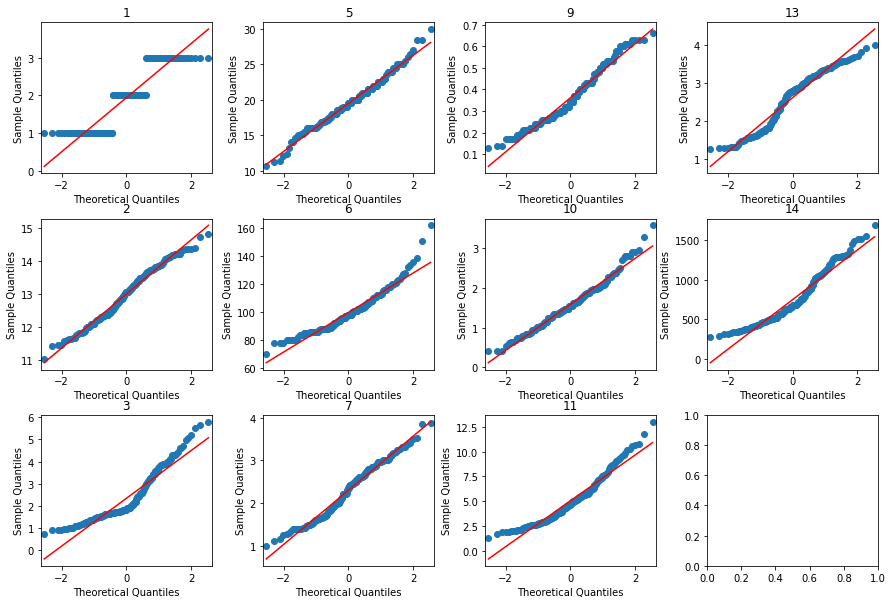

In [122]:
fig, axes = plt.subplots(3,4,figsize = (15,10))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
for i in range(3):
    for j in range(4):
        if i != 2 or j !=3 :
            gf.qqplot(Wine[i+4*j],ax = axes[i,j],line = 'r')
            axes[i,j].set_title(i+4*j + 1)

Для каждого из признаков нарисуйте Q-Q plot. Для наглядности и экономии места рисуйте графики в несколько строк и столбцов, используя `plt.subplot`.

Для каких признаков можно говорить об их нормальности и почему?

**Ответ:** 4,8,9,7,2 - больше всего график похож на прямую

Проверьте нормальность каждого признака статистическими критериями. Прежде чем выполнить следующую часть задачи, ответьте на вопросы. 

Для каждого признака используйте несколько критериев проверки нормальности. Какие критерии вы будете использовать?

**Ответ:** Можно использовать те, что мы исследовали выше. Они проверяют разные сво-ва нормального распределения

Результаты критериев нужно обработать с помощью *одной* процедуры множественной проверки гипотез для всех признаков и всех критериев сразу. Почему так нужно делать?

**Ответ:** Чтобы избежать повышение вероятности ошибки первого рода

Какой метод для контроля FWER стоит применить и почему?

**Ответ:** Выборки у нас зависимые так что можно Бенферони-Холма, для повышения мощности

Как понять из результата процедуры множественной проверки гипотез, нормальность каких признаков следует отклонить?

**Ответ:** Выбираем определнный признак. Смотрим результаты работы разных критериев. Если они между собой согласуются, то оставляем соответствующий результат. Если ответы разные, то гипотезу все же стоит отврегнуть, потому что истинное распределение не имеет какого-то сво-ва нормального

Если нормальность не отклоняется, что можно сказать про выборку? Ответ находится в презентации с лекции. 

**Ответ:** Если нормальность не отклоняется, то данное распределение имеет какие-то свой-ва нормального, но это еще не означает что оно истинно нормальное

Реализуйте данную схему. Предварительно соберите p-value всех критериев в таблицу. 

Функция `multipletests` принимает только одномерные массивы, поэтому для полученной `numpy`-таблицы нужно воспользоваться методом `ravel`. Результаты соберите обратно в таблицу с помощью метода `reshape`, которому необходимо передать размерности таблицы. Для наглядности сделайте таблицу с помощью `pandas.DataFrame`. В качестве названий строк используйте названия признаков, а названий столбцов — используемые критерии. В таблице должны присутстововать как значения p-value, так и результат проверки (`True` в случае отвержения).

In [141]:
P_v = np.zeros((5,3))
Index = np.array([3,7,8,6,1])

In [132]:
for i in range(5):
    P_v[i,0] = diagnostic.lilliefors(Wine[Index[i]], dist ='norm')[1]
    P_v[i,1] = sps.shapiro(Wine[Index[i]])[1]
    P_v[i,2] = sps.jarque_bera(Wine[Index[i]])[1]

In [130]:
Des = multipletests(P_v.ravel(),method = 'holm')[0].reshape((5,3))
P_v_m = multipletests(P_v.ravel(),method = 'holm')[1].reshape((5,3))

In [142]:
Table = pd.DataFrame(Des, columns = ['Lilliferis','Shapiro','Jarque Bera'],index = Index+1)
Table_pv = pd.DataFrame(P_v_m, columns = ['Lilliferis','Shapiro','Jarque Bera'],index = Index+1)
Table_pv

,Lilliferis,Shapiro,Jarque Bera
4,0.263656,0.245601,0.084859
8,0.052749,0.000252,0.263656
9,0.013000,0.001477,0.096422
7,0.245601,0.052749,0.263656
2,0.263656,0.160414,0.263656


In [143]:
Table

,Lilliferis,Shapiro,Jarque Bera
4,False,False,False
8,False,True,False
9,True,True,False
7,False,False,False
2,False,False,False


Для каких признаков нормальность не отвергается? 

 **Ответ:** Не отвергаяется для 4,7,2

**Вывод:** Мы исследовали на нормальность некоторые признаки в датасете. Использовали три разных критерия, которые отвечают за разные свойства. Например, 9 признак не прошел 2 проверки. Это значит, что его распределение не похоже на нормальное, всмысле распределения колмогорова, тест Шапиро-Уилка показывает отклонение на q-q плоте. 